In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm  # 로지스틱함수
import scipy.stats as spst  # 카이제곱검정

# 1.범주형 Y

In [2]:
path = 'train.csv'
data = pd.read_csv(path)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.가설수립

* 최소 6개의 가설을 수립하시오.

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 33) BsmtFinType1

In [5]:
var = 'BsmtFinType1'

1) 변수의 비즈니스 의미

> * 꾸며진(finished) 지하실 등급<br>&nbsp;&nbsp;Cf) Living Quarters 거처<br>
|범주|내용|
|------|---|
| GLQ | Good Living Quarters |
| ALQ | Average Living Quarters |
| BLQ | Below Average Living Quarters |
| Rec | Average Rec Room |
| LwQ | Low Quality |
| Unf | Unfinshed |
| NA | No Basement |

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [6]:
data[var].isna().sum()

37

> * NaN 존재
    * 범주형이기 때문에 최빈값으로 채움

In [7]:
# 최빈값으로 채움
# data[var].fillna(data[var].mode()[0], inplace = True)

# No basement라는 의미로 NA로 채움
data[var].fillna("NA", inplace = True)

In [8]:
# 확인
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [9]:
data[var].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [10]:
# 범주별 빈도수
data[var].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [11]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
NA     0.025342
Name: BsmtFinType1, dtype: float64

6) 분포 확인(시각화)

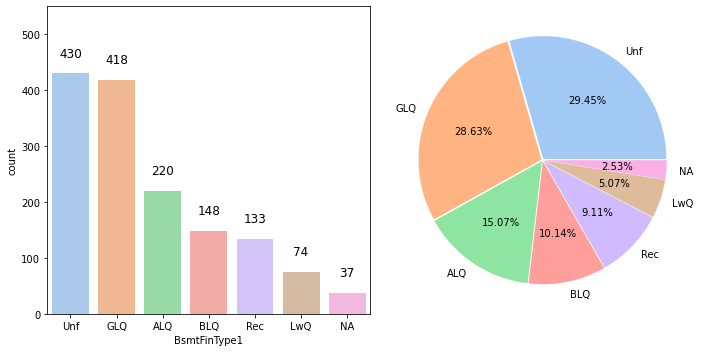

In [12]:
import warnings
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

ax = plt.subplot(1, 2, 1)
sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 550)

plt.subplot(1, 2, 2)
cnt = data[var].value_counts()  # 집계를 먼저 해야한다.
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
        colors = sns.color_palette("pastel"), explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 마감이 안 된 지하실 유형이 약 29.5%, 좋은 등급의 거처가 약 29%, 평균 등급의 거처가 약 15%, 평균 아래 등급의 거처가 약 10%, 평균 등급의 rec room이 약 9%, 낮은 품질 등급이 약 5%, 없는 경우 약 2.5%로 분포하고 있다.
> * 총 1460개 매물 중 37개 매물을 제외하고 모든 매물들이 지하실을 갖고 있다.
> * 지하실이 어떻게 꾸며져있고 어떤 용도로 쓰이냐에 따라 가격이 달라질 것으로 예상된다.

8) 추가 분석해 볼 사항이 있나요?

> * BsmtFinSF1변수(크기)와 함께 분석해볼 필요가 있다.

### 34) BsmtFinSF1

In [13]:
var = 'BsmtFinSF1'

1) 변수의 비즈니스 의미

> * 유형1(BsmtFinType1) 꾸며진/마감(finished) 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [14]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [15]:
data[var].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

6) 분포 확인(시각화)

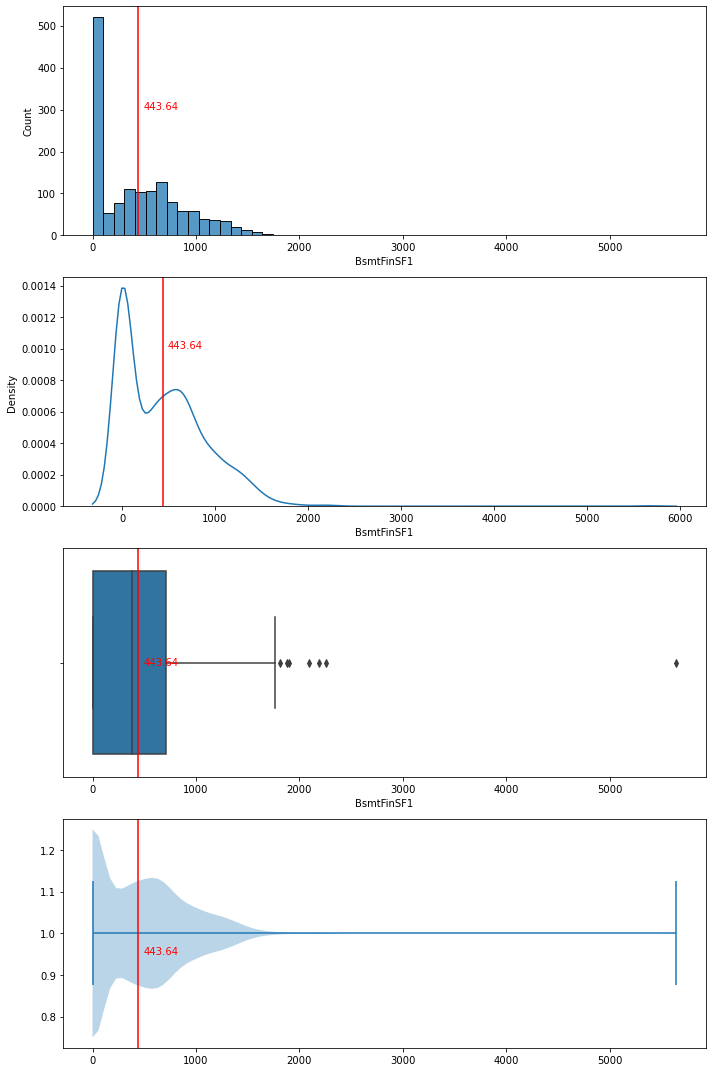

In [16]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 55)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 300, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.001, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 100 평방 피트 =  9.290 304 제곱미터 = 약 3평이다.
> * 따라서 해당 변수에서 값이 작은 경우는 마감은 된 지하실이지만 창고로 쓰이고 있을 확률이 크고 값이 커질수록 rec room등으로 꾸며져 있을 것으로 예상된다.

8) 추가 분석해 볼 사항이 있나요?

> * max값인 5644평방피트(약 168평)은 이상치로 분류, 따로 떼어내고 나머지들로 분석해볼 필요가 있다.

In [17]:
# 이상치 제거
data = data.loc[data['BsmtFinSF1'] <= 3000].reset_index(drop=True)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1458,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### 35) BsmtFinType2

In [18]:
var = 'BsmtFinType2'

1) 변수의 비즈니스 의미

> * 꾸며진(finished) 지하실2 등급(있는 경우)<br>&nbsp;&nbsp;Cf) Living Quarters 거처<br>
|범주|내용|
|------|---|
| GLQ | Good Living Quarters |
| ALQ | Average Living Quarters |
| BLQ | Below Average Living Quarters |
| Rec | Average Rec Room |
| LwQ | Low Quality |
| Unf | Unfinshed |
| NA | No Basement |

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [19]:
data[var].isna().sum()

38

> * NaN 존재
    * 범주형이기 때문에 최빈값으로 채움

In [20]:
# # 최빈값으로 채움
# data[var].fillna(data[var].mode()[0], inplace = True)

# No basement라는 의미로 NA로 채움
data[var].fillna("NA", inplace = True)

In [21]:
# 확인
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [22]:
data[var].unique()

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [23]:
# 범주별 빈도수
data[var].value_counts()

Unf    1255
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [24]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Unf    0.860178
Rec    0.037012
LwQ    0.031528
NA     0.026045
BLQ    0.022618
ALQ    0.013023
GLQ    0.009596
Name: BsmtFinType2, dtype: float64

6) 분포 확인(시각화)

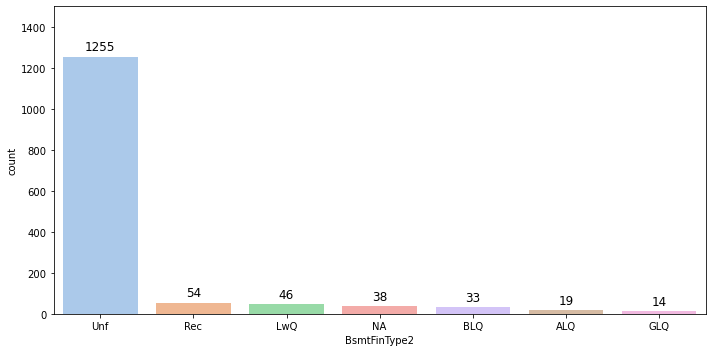

In [25]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts()
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 총 1460개 데이터 중 38개를 제외한 모든 매물에 지하실2가 있음을 확인할 수 있다.
    * 지하실1이 있는 경우, 대부분이 지하실2까지 있다고 볼 수 있다.
    * 지하실2의 경우 대부분 마감이 안 된 지하실로, 창고 등의 용도로 예상할 수 있다.

8) 추가 분석해 볼 사항이 있나요?

> * BsmtFinSF2변수(크기)와 함께 분석해볼 필요가 있다.

### 36) BsmtFinSF2

In [26]:
var = 'BsmtFinSF2'

1) 변수의 비즈니스 의미

> * 유형2(BsmtFinType1) 꾸며진/마감(finished) 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [27]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [28]:
data[var].describe()

count    1459.000000
mean       46.581220
std       161.369977
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

6) 분포 확인(시각화)

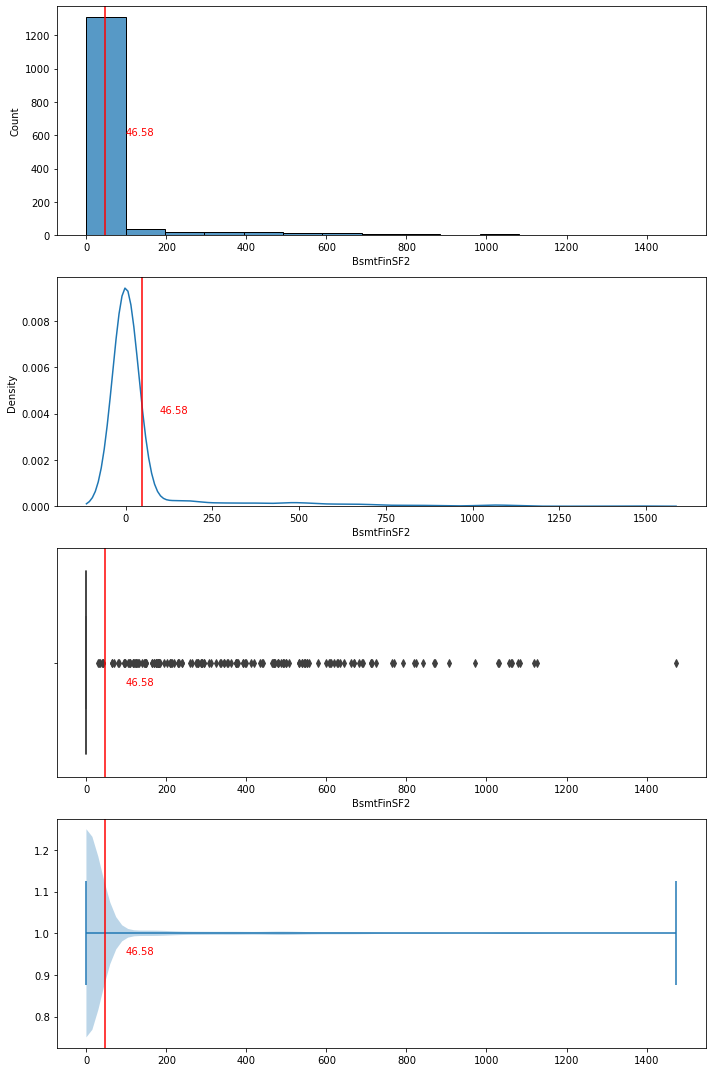

In [29]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 15)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 600, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.004, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.1, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 100 평방 피트 =  9.290 304 제곱미터 = 약 3평이다.
> * 평균적으로 약 46.55 평방피트(약 1.4평)이지만, 최소 75%가 마감이 안 된 지하실2를 갖고 있음을 확인할 수 있다.
> * 최대값인 1474평방피트는 약 44평이다.
    * 이 경우 집값이 비쌀 것으로 예상된다.
    * 추가로 마감이 안 된 지하실도 더 갖고 있을 확률도 클 것으로 예상된다.

8) 추가 분석해 볼 사항이 있나요?

> * 해당 매물(집)의 위치와 함께 분석해볼 필요가 있다.

In [30]:
# 이상치 제거
data = data.loc[data['BsmtFinSF2'] < 1400].reset_index(drop=True)

In [31]:
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1456,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1457,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### 37) BsmtUnfSF

In [32]:
var = 'BsmtUnfSF'

1) 변수의 비즈니스 의미

> * 미완성(마감이 안) 된 지하실 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [33]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [34]:
data[var].describe()

count    1458.000000
mean      567.698903
std       441.912134
min         0.000000
25%       223.250000
50%       479.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

6) 분포 확인(시각화)

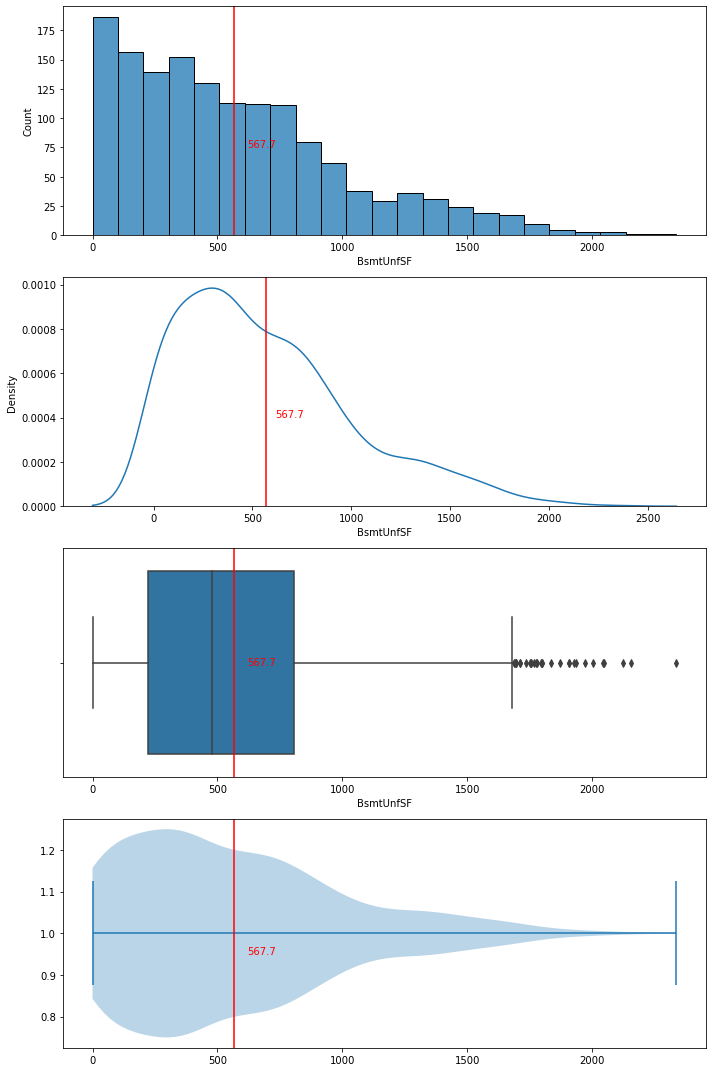

In [35]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 23)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 75, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.0004, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 100 평방 피트 = 9.290 304 제곱미터 = 약 3평이다.
> * 50%가 약 223 ~ 477평방피트(약 7 ~ 14평)이다.
    * 마감이 안 된 지하실의 경우 창고로 많이 쓰이고 있을 것으로 예상된다.
> * max값인 2336평방피트(약 70평)은 아직 인테리어가 안 끝난 경우 등을 생각해볼 수 있다.
    * 이상치로 가정하고 제외하고 분석해도 괜찮을 것 같다.

In [36]:
# 이상치 제거
data = data.loc[data['BsmtUnfSF'] < 2300].reset_index(drop=True)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1456,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


8) 추가 분석해 볼 사항이 있나요?

> * 지하실 전체 크기를 보는 게 더 유의미할 것으로 보인다.

### 38) TotalBsmtSF

In [37]:
var = 'TotalBsmtSF'

1) 변수의 비즈니스 의미

> * 지하 총 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [38]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [39]:
data[var].describe()

count    1457.000000
mean     1052.740563
std       417.066681
min         0.000000
25%       795.000000
50%       991.000000
75%      1296.000000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

6) 분포 확인(시각화)

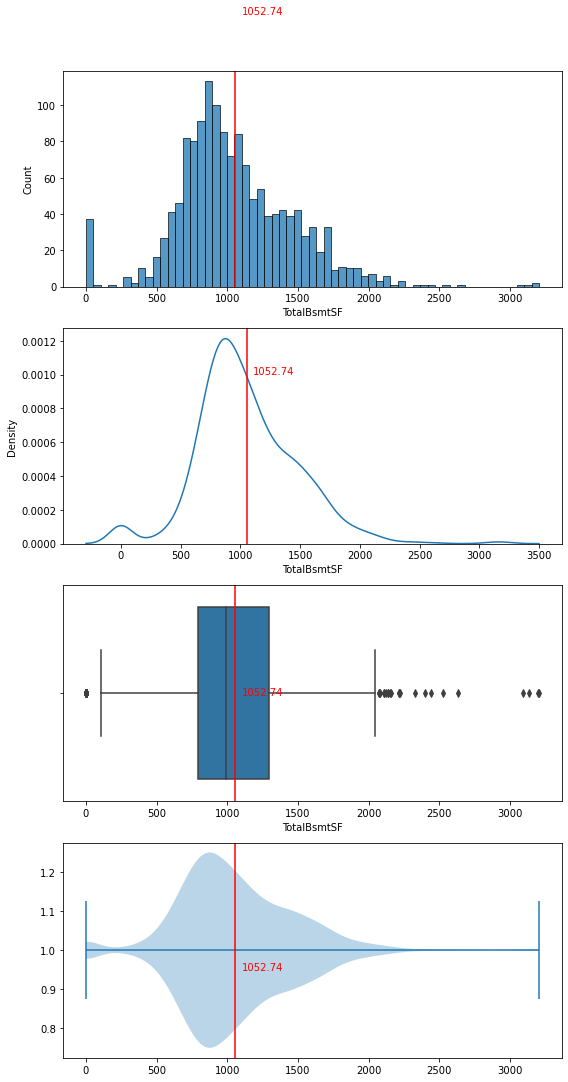

In [40]:
plt.figure(figsize = (8, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 61)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 150, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.001, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 100 평방 피트 = 9.290 304 제곱미터 = 약 3평이다.
> * min값인 0인 매물도 약 30건 정도 있는 것으로 파악된다.
> * 이를 제외한 대부분은 지하실을 갖고 있는 집이고, 이들 중 50%는 약 796 ~ 992평방피트(약 24 ~ 30평)의 지하실을 갖고 있다.
> * 3,000이상은 이상치로 본다.

In [41]:
# 이상치 제거
data = data.loc[data['TotalBsmtSF'] < 3000].reset_index(drop=True)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1451,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1452,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


8) 추가 분석해 볼 사항이 있나요?

> * 집이 위치한 지역 등과 함께 분석해볼 필요가 있다.

### 39) Heating

In [42]:
var = 'Heating'

1) 변수의 비즈니스 의미

> * 난방 유형<br>
|범주|내용|
|------|---|
| Floor | Floor Furnace |
| GasA | Gas forced warm air furnace |
| GasW | Gas hot water or steam heat |
| Grav | Gravity furnace |
| OthW | Hot water or steam heat other than gas |
| Wall | Wall furnace |

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [43]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

In [44]:
data[var].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [45]:
# 범주별 빈도수
data[var].value_counts()

GasA     1421
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [46]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

GasA     0.977977
GasW     0.012388
Grav     0.004818
Wall     0.002753
OthW     0.001376
Floor    0.000688
Name: Heating, dtype: float64

6) 분포 확인(시각화)

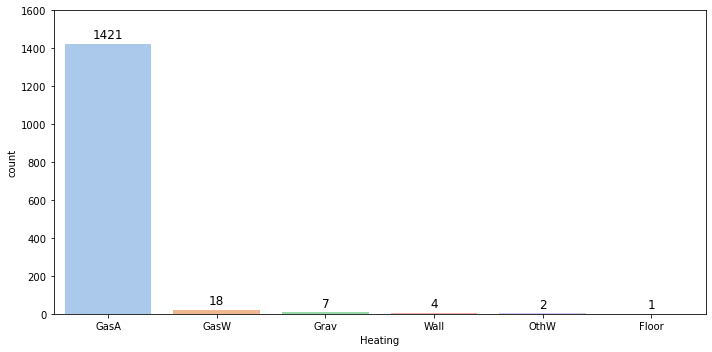

In [47]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1600)
    
# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts()
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분이 GasA를 사용함을 알 수 있다.
> * Wall 형태가 최신형태인 것으로 보이는데, 해당 변수를 통해 집이 지어진 년수를 파악해볼 수도 있을 것으로 생각된다.
    * 이를 통해 집값을 예측해볼 수도 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 지어진 년수와 함께 분석해볼 필요가 있다.

### 40) HeatingQC

In [48]:
var = 'HeatingQC'

1) 변수의 비즈니스 의미

> * 난방 품질 및 상태<br>
|범주|내용|
|------|---|
| Ex | Excellent |
| Gd | Good |
| TA | Average/Typical |
| Fa | Fair(평균 이하) |
| Po | Poor |

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [49]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

In [50]:
data[var].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

> * 필요

5) 기초통계량(수치화)

In [51]:
# 범주별 빈도수
data[var].value_counts()

Ex    734
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [52]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Ex    0.505162
TA    0.294563
Gd    0.165864
Fa    0.033723
Po    0.000688
Name: HeatingQC, dtype: float64

6) 분포 확인(시각화)

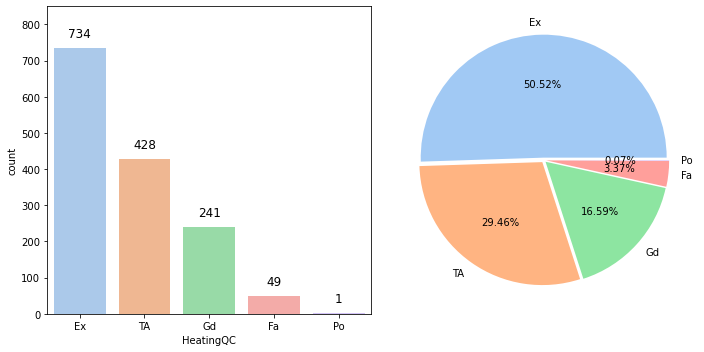

In [53]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))
# color = sns.color_palette("pastel")

plt.subplot(1, 2, 1)
# palette = ['r', 'g', 'b']
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 850)

plt.subplot(1, 2, 2)
cnt = data[var].value_counts()  # 집계를 먼저 해야한다.
# colors = ['b', 'r', 'g']
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
        colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * Ex가 약 50.5%, TA가 약 29.5%, Gd가 약 16.6%, Fa가 약 3.4%, Po가 단 1건임을 확인할 수 있다.
> * 1건을 제외하곤 전부 평균이상이다.
    * 1건은 고장났는데 수리를 안 한 상태라고 생각할 수 있다.
    * 따라서 집값에서 수리비만큼 빠졌을 확률이 있다.

### 41) CentralAir

In [54]:
var = 'CentralAir'

1) 변수의 비즈니스 의미

> * 중앙 에어컨 (Y / N)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [55]:
data[var].isna().sum()

0

> * NaN없음

4) 가변수화 필요 여부

In [56]:
data[var].unique()

array(['Y', 'N'], dtype=object)

> * 범주형이지만 0, 1이 아니기 때문에 필요

5) 기초통계량(수치화)

In [57]:
# 범주별 빈도수
data[var].value_counts()

Y    1358
N      95
Name: CentralAir, dtype: int64

In [58]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Y    0.934618
N    0.065382
Name: CentralAir, dtype: float64

6) 분포 확인(시각화)

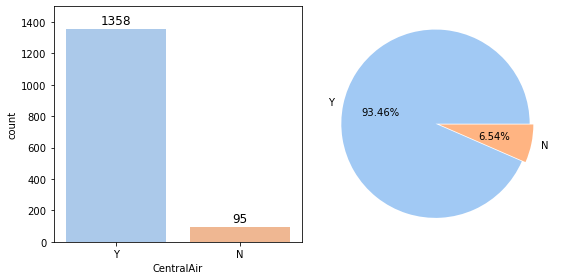

In [59]:
plt.figure(figsize = (8,4))

plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"), order = ['Y', 'N'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

plt.subplot(1, 2, 2)
cnt = data[var].value_counts()  # 집계를 먼저 해야한다.
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
        colors = sns.color_palette("pastel"), explode = [0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분이 중앙 에어컨이 있다.
    * 없는 집은 있는 집보다 가격이 저렴할 것으로 예상된다.
    * 또는 지역 위치상 선선한 기후일 경우라면, 굳이 안 달았을 것으로도 예상된다.

8) 추가 분석해 볼 사항이 있나요?

> * 위치한 지역과 같이 분석해볼 필요가 있다.

### 42) Electrical

In [60]:
var = 'Electrical'

1) 변수의 비즈니스 의미

> * 전기 시스템<br>
cf) Romex: 일반적으로 주거용 분기 배선으로 사용되는 비금속 피복이 있는 전기 도체 유형의 상표명<br>

<img src="https://sc04.alicdn.com/kf/Hf0ba1d34b51d4c7ba72121ce6b433572L.jpg" width = 100)><br>

|범주|내용|
|------|---|
| SBrkr | 표준 회로 차단기 및 Romex |
| FuseA | 60 암페어 이상의 퓨즈 박스 및 모든 Romex 배선(평균) |
| FuseF | 60 암페어 퓨즈 박스 및 대부분의 Romex 배선(평균이하) |
| FuseP | 60 암페어 퓨즈 박스 및 대부분의 손잡이 및 튜브 배선(불량) |
| Mix | 혼합 |

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [61]:
data[var].isna().sum()

1

> * NaN존재
    * 최빈값으로 채움

In [62]:
# 최빈값으로 채움
data[var].fillna(data[var].mode()[0], inplace = True)

In [63]:
# 확인
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [64]:
data[var].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

> * 범주형이지만, 0과 1로 되어있지 않기 때문에 가변수화 필요

5) 기초통계량(수치화)

In [65]:
# 범주별 빈도수
data[var].value_counts()

SBrkr    1328
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [66]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

SBrkr    0.913971
FuseA    0.064694
FuseF    0.018582
FuseP    0.002065
Mix      0.000688
Name: Electrical, dtype: float64

6) 분포 확인(시각화)

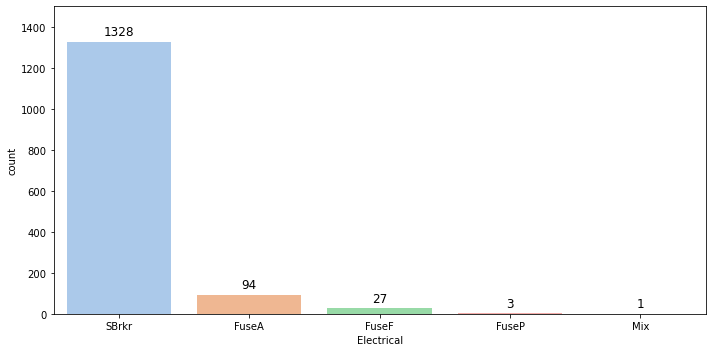

In [67]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1500)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts() 
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * SBrkr(표준 회로 차단기 및 Romex)이 1333건으로 가장 많고 그 다음으로 FuseA(60 암페어 이상의 퓨즈 박스 및 모든 Romex 배선(평균)), FuseF(60 암페어 퓨즈 박스 및 대부분의 Romex 배선(평균이하)), FuseP(60 암페어 퓨즈 박스 및 대부분의 손잡이 및 튜브 배선(불량)), Mix 순이다.
> * FuseF와 FuseP의 경우 같은 지역, 비슷한 규모의 집과 비교했을 때, 수리비용 등으로 인해 상대적으로 더 쌀 수도 있을 것으로 보인다.

8) 추가 분석해 볼 사항이 있나요?

> * FuseF와 FuseP의 경우 같은 지역, 비슷한 규모의 집과 비교해볼 필요가 있다.

### 43) 1stFlrSF

In [68]:
var = '1stFlrSF'

1) 변수의 비즈니스 의미

> * 1층 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [69]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [70]:
data[var].describe()

count    1453.000000
mean     1155.128011
std       365.454093
min       334.000000
25%       882.000000
50%      1086.000000
75%      1383.000000
max      2898.000000
Name: 1stFlrSF, dtype: float64

6) 분포 확인(시각화)

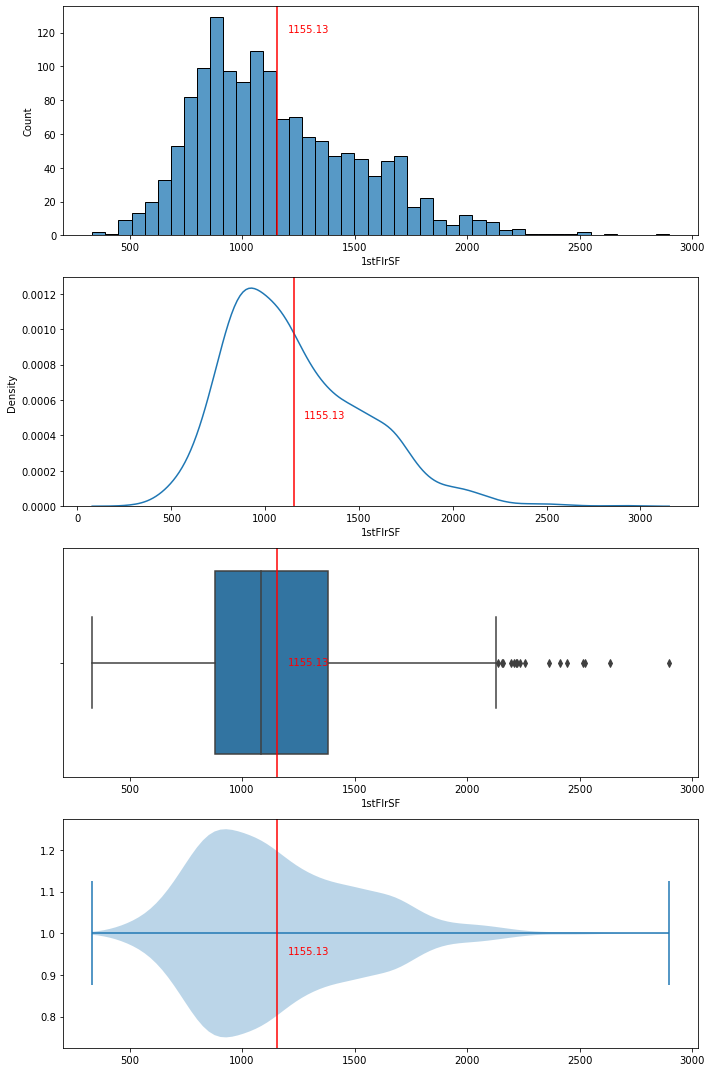

In [71]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 44)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 120, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.0005, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 100 평방 피트 = 9.290 304 제곱미터 = 약 3평이다.
> * 평균은 약 1160평방피트(약 35평)이고 살짝 왼쪽으로 그려진 그래프이다.
> * 50%가 882 ~ 1086평방피트(약 27 ~ 33평) 크기의 1층을 갖고 있다.
> * 3,000 평방피트(약 90평)이상은 이상치로 분류한다.
    * cf) max값인 3,228평방피트(약 97평)

In [72]:
# 이상치 제거
data = data.loc[data['1stFlrSF'] < 2898].reset_index(drop=True)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1451,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


8) 추가 분석해 볼 사항이 있나요?

> * n층이 있다면, 1층과 모든 층의 크기를 합쳐서 분석해볼 필요가 있다.

### 44) 2ndFlrSF

In [73]:
var = '2ndFlrSF'

1) 변수의 비즈니스 의미

> * 2층 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [74]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [75]:
data[var].describe()

count    1452.000000
mean      346.380165
std       435.303850
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

6) 분포 확인(시각화)

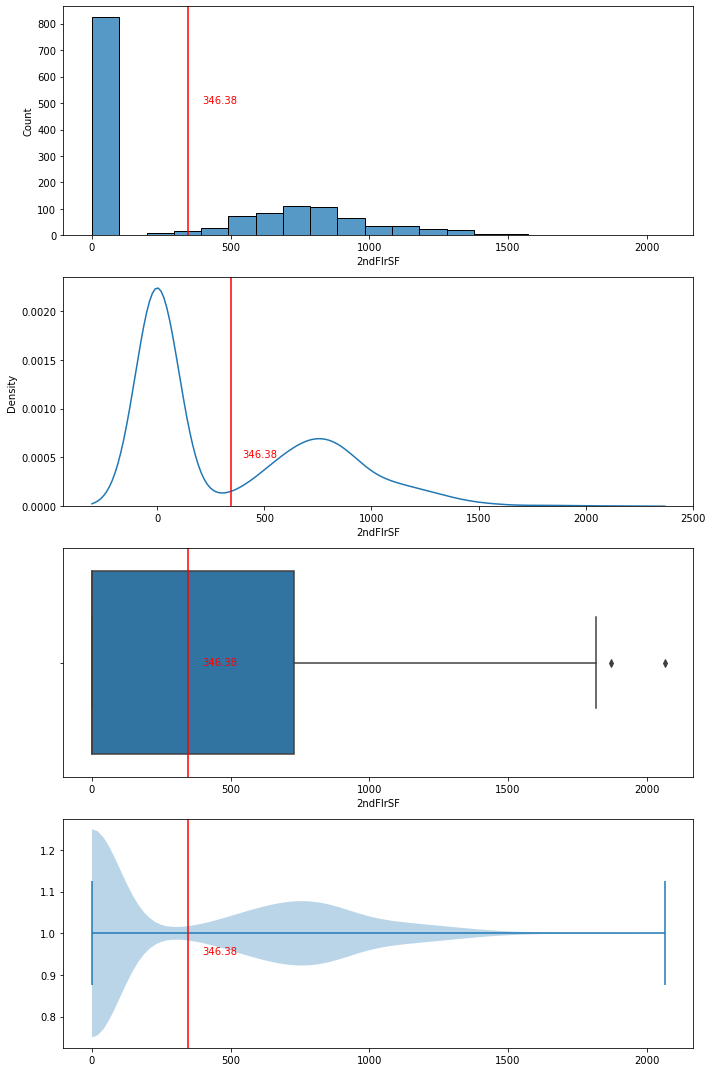

In [76]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 21)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 500, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.0005, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 기초 통계량을 봤을 때, 최소 50%는 2층이 없는 집들이다.
> * 100 평방피트 = 9.290 304 제곱미터 = 약 3평이다.
> * 2000 평방피트(약 60평) 이상인 데이터는 이상치로 본다.
> * 2층이 있는 집들은 1층에 차고가 있을 것으로 예상된다.

In [77]:
# 이상치 제거
data = data.loc[data['2ndFlrSF'] < 2000].reset_index(drop=True)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1449,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1450,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


8) 추가 분석해 볼 사항이 있나요?

> * 1층과 합쳐서 분석해볼 필요가 있다.

### 45) LowQualFinSF

In [78]:
var = 'LowQualFinSF'

1) 변수의 비즈니스 의미

> * 저품질 마감 평방 피트(모든 층)

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [79]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [80]:
data[var].describe()

count    1451.000000
mean        5.880772
std        48.771560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

In [81]:
# 0이상인 데이터 26건
len(data.loc[data['LowQualFinSF'] > 0])

26

6) 분포 확인(시각화)

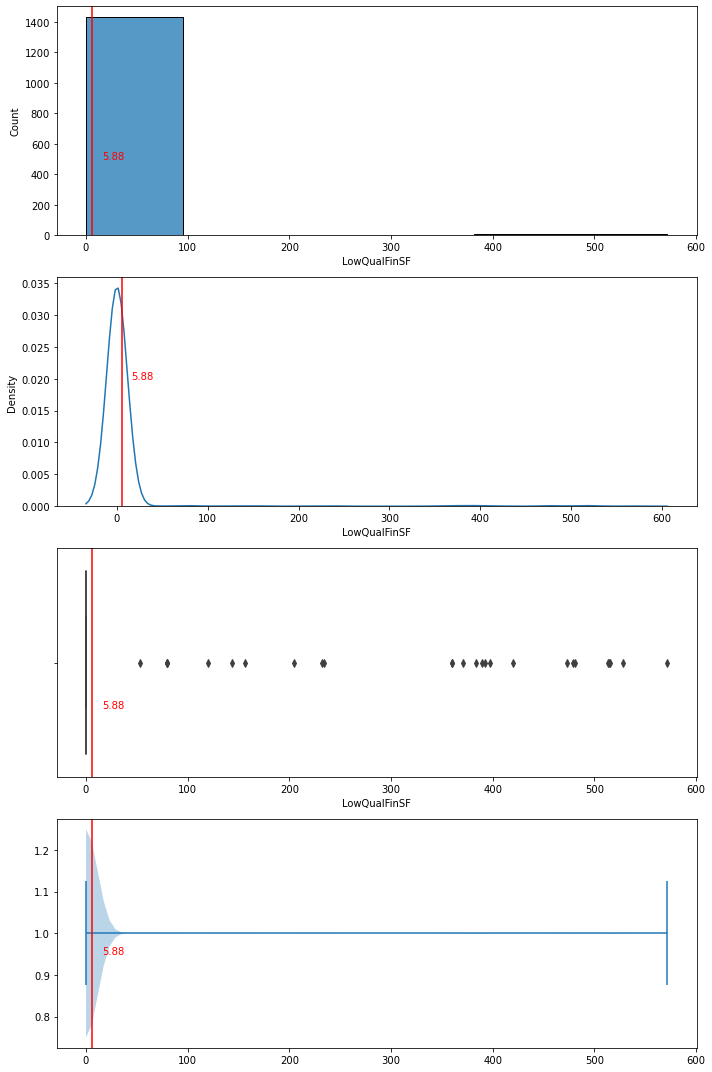

In [82]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 6)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 10, 500, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 10, 0.02, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 10, 0.2, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 10, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 26개의 집만이 저품질 마감인 상태이다.
    * 해당 집들의 집값은 인테리어 비용 등이 빠져서 쌀 것으로 예상된다.

### 46) GrLivArea

In [83]:
var = 'GrLivArea'

1) 변수의 비즈니스 의미

> * 지상 생활공간 평방 피트

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [84]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

> * 숫자형이기때문에 가변수화 불필요

5) 기초통계량(수치화)

In [85]:
data[var].describe()

count    1451.000000
mean     1504.137836
std       497.593174
min       334.000000
25%      1128.000000
50%      1456.000000
75%      1772.500000
max      4316.000000
Name: GrLivArea, dtype: float64

6) 분포 확인(시각화)

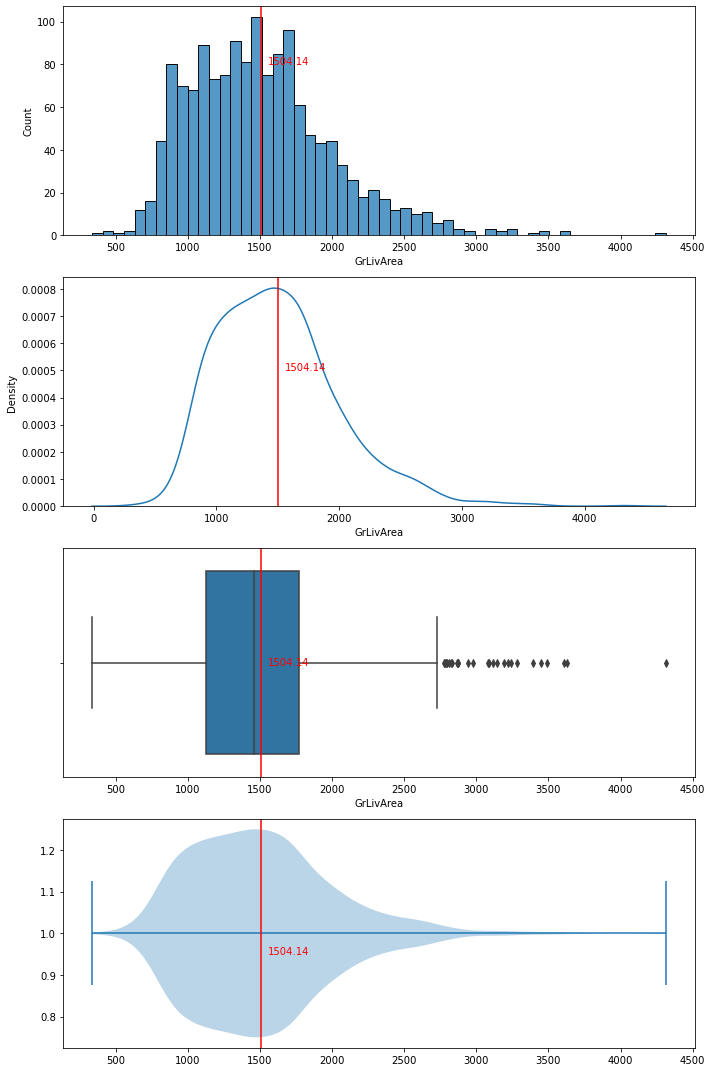

In [86]:
plt.figure(figsize = (10, 15))
var_m = np.mean(data[var])

plt.subplot(4, 1, 1)
sns.histplot(data[var], bins = 54)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 80, round(var_m, 2), color='r')

plt.subplot(4, 1, 2)
sns.kdeplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.0005, round(var_m, 2), color='r')

plt.subplot(4, 1, 3)
sns.boxplot(data[var])
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.01, round(var_m, 2), color='r')

plt.subplot(4, 1, 4)
plt.violinplot(data[var], vert = False, showmeans = False)
plt.axvline(var_m, color='red', linestyle='-')
plt.text(var_m + 50, 0.95, round(var_m, 2), color='r')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [87]:
# '1층 + 2층 = 지상 생활공간'인지 확인
data[['1stFlrSF', '2ndFlrSF', 'GrLivArea']].tail()

,1stFlrSF,2ndFlrSF,GrLivArea
1446,953,694,1647
1447,2073,0,2073
1448,1188,1152,2340
1449,1078,0,1078
1450,1256,0,1256


> * 1층 + 2층의 크기를 나타내는 변수이다.
> * 100 평방 피트 = 9.290 304 제곱미터 = 약 3평이다.
> * 50%가 약 1128 ~ 1772평방피트(약 34 ~ 54평)이다.
    * 이들은 1층짜리의 4인 이상의 가족단위를 위한 집들로 예상된다.
> * 4,000이상은 이상치로 본다.

In [88]:
# 이상치 제거
data = data.loc[data['GrLivArea'] < 4000].reset_index(drop=True)
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1448,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1449,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### 47) BsmtFullBath

In [89]:
var = 'BsmtFullBath'

1) 변수의 비즈니스 의미

> * 지하에 온전한 욕실 개수(0, 1, 2, 3)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [90]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

In [91]:
data[var].unique()

array([1, 0, 2, 3], dtype=int64)

> * 범주형이지만, 0과 1로 되어있지 않기 때문에 가변수화 필요

5) 기초통계량(수치화)

In [92]:
# 범주별 빈도수
data[var].value_counts()

0    854
1    581
2     14
3      1
Name: BsmtFullBath, dtype: int64

In [93]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

0    0.588966
1    0.400690
2    0.009655
3    0.000690
Name: BsmtFullBath, dtype: float64

6) 분포 확인(시각화)

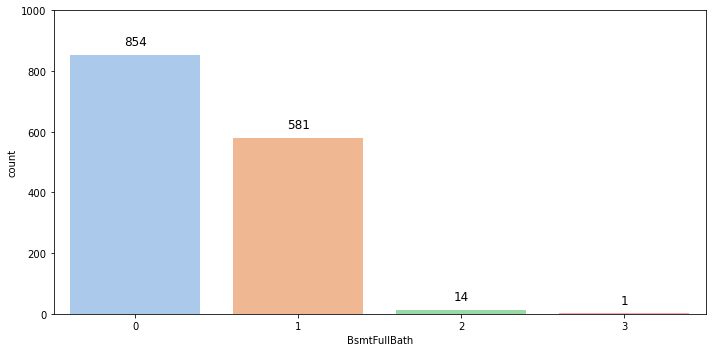

In [94]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1000)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts()
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 절반이상이 지하에 온전한 욕실이 없는 것을 확인할 수 있다.
> * 2개 또는 3개의 경우 도심 외 지역에 위치하여 상대적으로 땅값이 싸서 크게 지어진 것일 수도 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 위치한 지역과 함께 분석해볼 필요가 있다.

### 48) BsmtHalfBath

In [95]:
var = 'BsmtHalfBath'

1) 변수의 비즈니스 의미

> * 지하에 분리형 욕실 개수(0, 1, 2)

2) 숫자, 범주?

> * 범주

3) NaN 존재 유무 및 조치방안

In [96]:
data[var].isna().sum()

0

> * NaN 없음

4) 가변수화 필요 여부

In [97]:
data[var].unique()

array([0, 1, 2], dtype=int64)

> * 범주형이지만, 0과 1로 되어있지 않기 때문에 가변수화 필요

5) 기초통계량(수치화)

In [98]:
# 범주별 빈도수
data[var].value_counts()

0    1369
1      79
2       2
Name: BsmtHalfBath, dtype: int64

In [99]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

0    0.944138
1    0.054483
2    0.001379
Name: BsmtHalfBath, dtype: float64

6) 분포 확인(시각화)

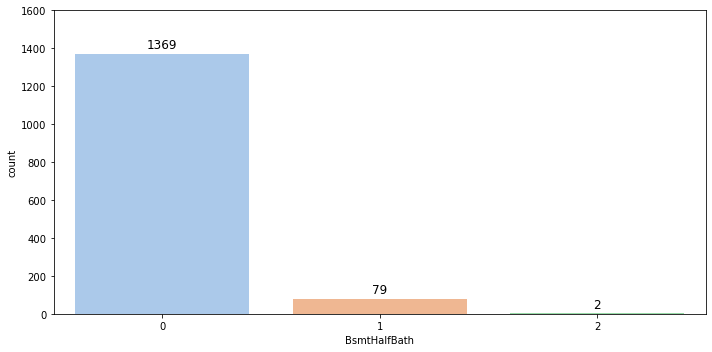

In [100]:
warnings.filterwarnings(action='ignore')  # 경고 무시

plt.figure(figsize = (10, 5))

# plt.subplot(1, 2, 1)
ax = sns.countplot(data[var], palette = sns.color_palette("pastel"),
              order = data[var].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 1600)

# plt.subplot(1, 2, 2)
# cnt = data[var].value_counts()
# plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
#         colors = sns.color_palette("pastel"), explode = [0.02, 0.02, 0.02])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분이 지하에 분리된 욕실이 없는 것을 확인할 수 있다.
> * 2개의 경우는 왜 1개의 온전한 욕실로 안 만들고 나눠서 2개를 만들었는지에 대해 생각해볼 필요가 있다.
    * 변기와 씻는 곳을 분리하여 각각 만들어서 2개로 카운트했을지 알아볼 필요가 있다.
    * 그게 아니라면, 해당 집들은 크기가 클 것으로 예상된다.

8) 추가 분석해 볼 사항이 있나요?

> * 위치한 지역과 함께 분석해볼 필요가 있다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [101]:
target = 'SalePrice'

### (1) 숫자형 X --> 숫자형 Y

* 그래프 : jointplot
* 수치화 : 상관분석  
* 관계 평가

1) 상관계수

In [102]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.009543,-0.022254,-0.037766,-0.027666,0.011631,-0.011428,-0.020846,-0.048429,-0.016936,...,-0.029125,-0.001520,0.002926,-0.046907,0.002444,0.040788,-0.006369,0.024148,0.001820,-0.020807
MSSubClass,0.009543,1.000000,-0.407363,-0.141465,0.038681,-0.060376,0.030259,0.042298,0.026123,-0.071402,...,-0.012731,-0.005883,-0.008554,-0.044205,-0.025051,0.007796,-0.007936,-0.013940,-0.020032,-0.081546
LotFrontage,-0.022254,-0.407363,1.000000,0.386979,0.220072,-0.053945,0.110717,0.077093,0.156774,0.131411,...,0.076646,0.114782,0.018403,0.076145,0.045171,0.075541,0.006141,0.028294,0.008245,0.351631
LotArea,-0.037766,-0.141465,0.386979,1.000000,0.087092,-0.002592,0.005775,0.006437,0.080956,0.172860,...,0.167477,0.061222,-0.017632,0.021637,0.044988,0.033946,0.039297,0.007757,-0.013497,0.271164
OverallQual,-0.027666,0.038681,0.220072,0.087092,1.000000,-0.088523,0.570511,0.551037,0.395998,0.207275,...,0.233901,0.297351,-0.119104,0.032726,0.064394,0.018691,-0.030669,0.078403,-0.028186,0.798907
OverallCond,0.011631,-0.060376,-0.053945,-0.002592,-0.088523,1.000000,-0.374892,0.076162,-0.128834,-0.041617,...,-0.002179,-0.029153,0.071186,0.025255,0.055473,0.007994,0.068632,-0.002831,0.044303,-0.076980
YearBuilt,-0.011428,0.030259,0.110717,0.005775,0.570511,-0.374892,1.000000,0.591040,0.312667,0.246498,...,0.222901,0.183354,-0.392449,0.032143,-0.051612,-0.014208,-0.033963,0.013820,-0.014184,0.535743
YearRemodAdd,-0.020846,0.042298,0.077093,0.006437,0.551037,0.076162,0.591040,1.000000,0.173684,0.119839,...,0.204312,0.222622,-0.195041,0.045890,-0.040125,-0.009380,-0.009929,0.022495,0.035132,0.523868
MasVnrArea,-0.048429,0.026123,0.156774,0.080956,0.395998,-0.128834,0.312667,0.173684,1.000000,0.241304,...,0.147931,0.104626,-0.106912,0.020889,0.065891,-0.015933,-0.029598,0.003169,-0.008842,0.480742
BsmtFinSF1,-0.016936,-0.071402,0.131411,0.172860,0.207275,-0.041617,0.246498,0.119839,0.241304,1.000000,...,0.206165,0.072371,-0.112613,0.030606,0.065373,0.016752,0.005574,0.000091,0.016527,0.390085


2) 시각화

In [103]:
# plt.figure(figsize = (20, 20))
# sns.heatmap(data.corr(), annot = True, fmt = 'g', cmap = 'Blues',  vmin = -1, vmax = 1)
# plt.show()

#### ① BsmtFinSF1 --> target

In [104]:
feature = 'BsmtFinSF1'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

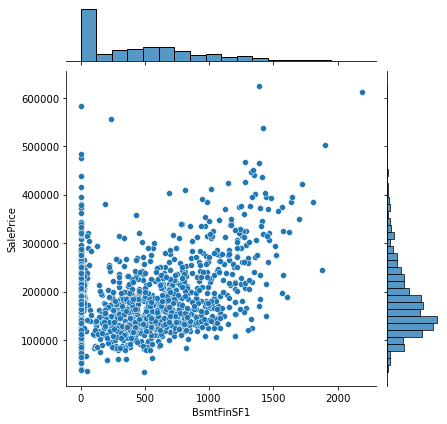

In [105]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [106]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.39008478471183267, p-value: 6.69355815686178e-54


3) 관계 평가하기

> * 상관계수가 약 0.4, p-value가 0으로 수렴하는 걸로 보아, 타겟와 중간관계라고 볼 수 있다.

4) 추가 분석할 내용 정리

> * BsmtFinSF1가 0이 아닌 경우만 떼어내서 분석해볼 필요가 있다.

In [107]:
# # 정규화 해봤는데 똑같음;
# plt.figure(figsize=(10,6))

# plt.subplot(1, 2, 1)
# x = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min())
# y = (data[target] - data[target].min()) / (data[target].max() - data[target].min())
# sns.scatterplot(x = x, y = y, data = data)

# plt.tight_layout()
# plt.show()

In [108]:
data2 = data.loc[data['BsmtFinSF1'] > 0]
corr = spst.pearsonr(data2[feature], data2[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.5090495281286515, p-value: 6.397751915036461e-66


> * 0을 떼어내고 분석했을 때, 그렇지 않았을 때보다 target과 더 강한관계가 되었음을 확인할 수 있다.

#### ② BsmtFinSF2 --> target

In [109]:
feature = 'BsmtFinSF2'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

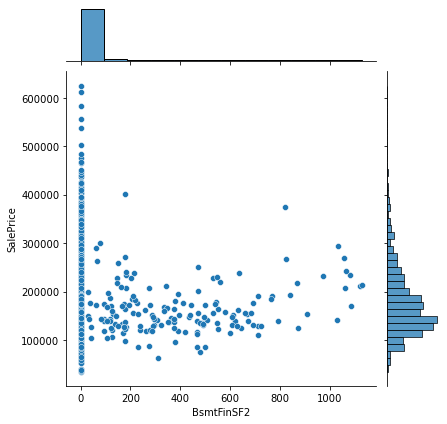

In [110]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [111]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: -0.03395913078541489, p-value: 0.1962246388469331


3) 관계 평가하기

> * 상관계수가 약 -0.03, p-value가 약 0.19로 , 타겟과 관계가 없다고 볼 수 있다.

4) 추가 분석할 내용 정리

> * BsmtFinSF2가 0이 아닌 경우만 떼어내서 분석해볼 필요가 있다.

In [112]:
data2 = data.loc[data['BsmtFinSF2'] > 0]
corr = spst.pearsonr(data2[feature], data2[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.16242729334879952, p-value: 0.03830737363358313


> * 0을 떼어냈을 때, 그렇지 않았을 때보다 관계가 있는 것으로 보이지만 상관계수가 약 0.16, p-value가 약 0.038인 것으로 보아, 거의 없는(약한) 관계임을 알 수 있다.

#### ③ BsmtUnfSF --> target

In [113]:
feature = 'BsmtUnfSF'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

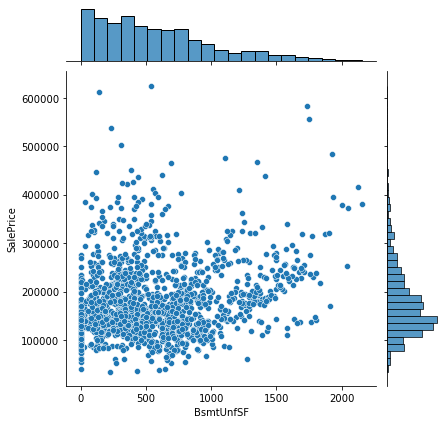

In [114]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [115]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.2109314965857687, p-value: 4.794580121000768e-16


3) 관계 평가하기

> * 상관계수가 약 0.21, p-value가 0으로 수렴하는 것으로 보아, 타겟와 중간관계로 볼 수 있다.

4) 추가 분석할 내용 정리

> * 산점도의 한계를 생각해보면, 구간별로 나눠서 분석해볼 필요가 있다.

#### ④ 추가분석(BsmtUnfSF_grp)

1) 구간 나누기

In [116]:
bins = [-np.inf, 500, 1000, 1500, 2000, np.inf]
labels = ['500미만', '1000미만', '1500미만', '2000미만', '2000이상']
data['BsmtUnfSF_grp'] = pd.cut(data['BsmtUnfSF'], bins, labels=labels, right=False)

#### cf) 한글 안 깨지는 코드

In [117]:
from matplotlib import font_manager, rc  # 한글 안 깨지게 추가한 코드
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

2) 시각화(barplot)

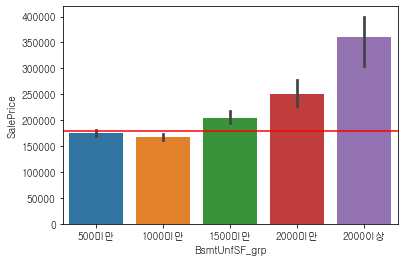

In [118]:
sns.barplot(x='BsmtUnfSF_grp', y='SalePrice', data=data)
plt.axhline(data['SalePrice'].mean(), color='r')  # 전체평균(기준)
plt.show()

3) 수치화(ANOVA)

In [119]:
data['BsmtUnfSF_grp'].isna().sum()

0

In [120]:
BUSF_500 = data.loc[data.BsmtUnfSF_grp == '500미만', 'SalePrice']
BUSF_1000 = data.loc[data.BsmtUnfSF_grp == '1000미만', 'SalePrice']
BUSF_1500 = data.loc[data.BsmtUnfSF_grp == '1500미만', 'SalePrice']
BUSF_2000 = data.loc[data.BsmtUnfSF_grp == '2000미만', 'SalePrice']
BUSF_2000up = data.loc[data.BsmtUnfSF_grp == '2000이상', 'SalePrice']

In [121]:
spst.f_oneway(BUSF_500, BUSF_1000, BUSF_1500, BUSF_2000, BUSF_2000up)
# 여기서 statistic은 F통계량을 의미(분산비)
# 보통, F값이 보통 2~3이상이면 차이가 있다고 봄

F_onewayResult(statistic=29.268859235615924, pvalue=1.9786580791361756e-23)

> * F값이 약 29, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ⑤ TotalBsmtSF --> target

In [122]:
feature = 'TotalBsmtSF'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

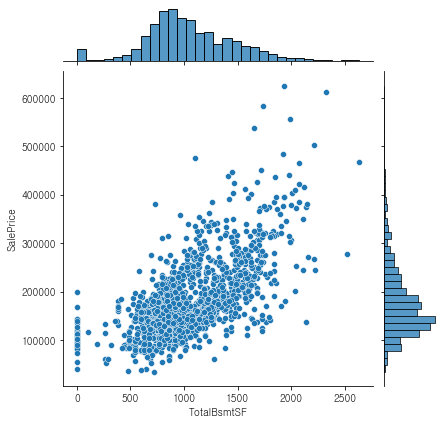

In [123]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [124]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.6357078647094846, p-value: 5.375162811876402e-165


3) 관계 평가하기

> * 상관계수가 약 0.64, p-value가 약 0으로 수렴하는 것으로 보아, 타겟과 강한관계라고 볼 수 있다.

#### ⑥ 1stFlrSF --> target

In [125]:
feature = '1stFlrSF'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

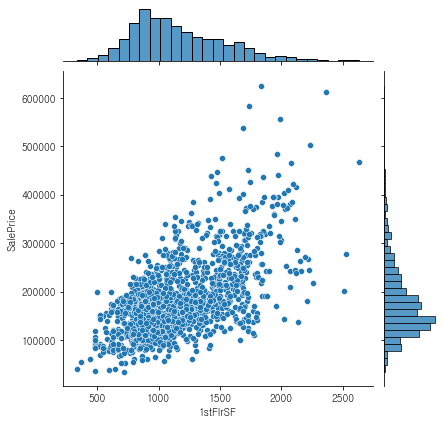

In [126]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [127]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.6151434361887056, p-value: 1.07956794251341e-151


3) 관계 평가하기

> * 상관계수가 약 0.62, p-value가 0으로 수렴하는 걸로 보아, 타겟과 강한관계라고 볼 수 있다.

#### ⑦ 2ndFlrSF --> target

In [128]:
feature = '2ndFlrSF'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

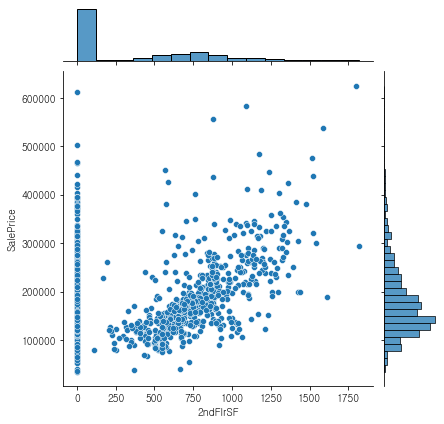

In [129]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [130]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.30852088173303743, p-value: 2.3913146267023343e-33


3) 관계 평가하기

> * 상관계수가 약 0.31, p-value가 0으로 수렴하는 걸로 보아, 타겟과 중간관계라고 볼 수 있다.

4) 추가 분석할 내용 정리

> * 2ndFlrSF이 0이 아닌 경우만 떼어내서 분석해볼 필요가 있다.

In [131]:
data2 = data.loc[data['2ndFlrSF'] > 0]
corr = spst.pearsonr(data2[feature], data2[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.6521193312858506, p-value: 4.40643431681482e-77


> * 0을 떼어냈을 때, 그렇지 않았을 때보다 더 강한 관계가 있는 것을 알 수 있다.
    * 즉, 2층이 있는 경우에 따라 집값에 차이가 있다.

#### ⑧ LowQualFinSF --> target

In [132]:
feature = 'LowQualFinSF'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

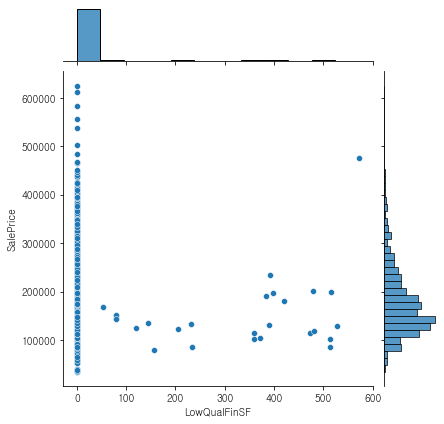

In [133]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [134]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: -0.024501127356476086, p-value: 0.35117609523185256


3) 관계 평가하기

> * 상관계수가 약 -0.02, p-value가 약 0.35로, 타겟과 관계가 없다고 볼 수 있다.

4) 추가 분석할 내용 정리

> * LowQualFinSF가 0이 아닌 경우만 떼어내서 분석해볼 필요가 있다.

In [135]:
data2 = data.loc[data['LowQualFinSF'] > 0]
corr = spst.pearsonr(data2[feature], data2[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.30007501655501323, p-value: 0.13638002605126576


> * 0을 떼어냈을 때, 그렇지 않았을 때보다 상관계수가 커졌지만, p-value가 5%를 넘는 것으로 보아 해당 변수는 타켓과 관계가 없다.

#### ⑨ GrLivArea --> target

In [136]:
feature = 'GrLivArea'

1) 그래프 : scatterplot

<Figure size 720x432 with 0 Axes>

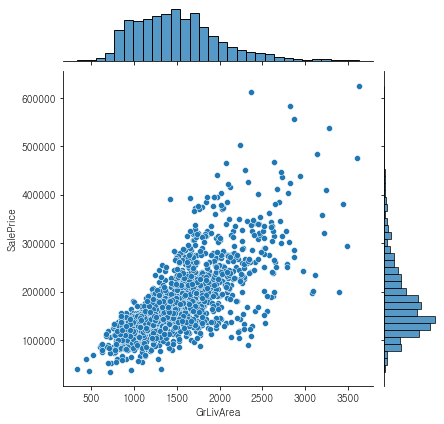

In [137]:
plt.figure(figsize=(10,6))
sns.jointplot(x=data[feature], y=data[target], data = data)
plt.show()

2) 수치화 : 상관계수와 p-value

In [138]:
# 상관계수와 p-value 
corr = spst.pearsonr(data[feature], data[target])
print('상관계수: {}, p-value: {}'.format(corr[0], corr[1]))

상관계수: 0.7176427345610046, p-value: 8.612256299535791e-230


3) 관계 평가하기

> * 상관계수가 약 0.72, p-value가 0으로 수렴하는 것으로 보아, 타겟과 강한관계가 있다고 볼 수 있다.

### (2) 범주형 X --> 숫자형 Y

* 시각화(barplot)
* 수치화(t-test / anova)
* 관계 평가

#### ① BsmtFinType1 --> target

In [139]:
feature = 'BsmtFinType1'

2) 시각화(barplot)

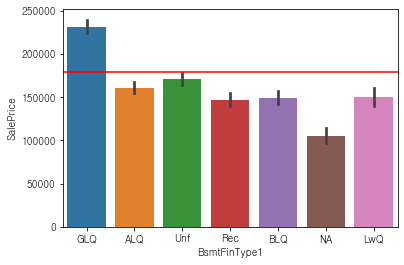

In [140]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [141]:
data[feature].isna().sum()

0

In [142]:
data[feature].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

In [143]:
GLQ = data.loc[data.BsmtFinType1 == 'GLQ', target]
ALQ = data.loc[data.BsmtFinType1 == 'ALQ', target]
Unf = data.loc[data.BsmtFinType1 == 'Unf', target]
Rec = data.loc[data.BsmtFinType1 == 'Rec', target]
BLQ = data.loc[data.BsmtFinType1 == 'BLQ', target]
NA = data.loc[data.BsmtFinType1 == 'NA', target]
LwQ = data.loc[data.BsmtFinType1 == 'LwQ', target]

In [144]:
spst.f_oneway(GLQ, ALQ, Unf, Rec, BLQ, NA, LwQ)

F_onewayResult(statistic=64.80609640403569, pvalue=2.0575622010456682e-71)

4) 관계 평가하기

> * F값이 약 64.8, p-value가 0에 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ② BsmtFinType2 --> target

In [145]:
feature = 'BsmtFinType2'

2) 시각화(barplot)

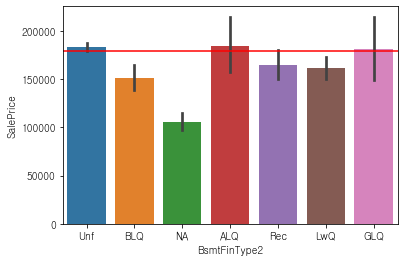

In [146]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [147]:
data[feature].isna().sum()

0

In [148]:
data[feature].unique()

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [149]:
Unf = data.loc[data.BsmtFinType2 == 'Unf', target]
BLQ = data.loc[data.BsmtFinType2 == 'BLQ', target]
NA = data.loc[data.BsmtFinType2 == 'NA', target]
ALQ = data.loc[data.BsmtFinType2 == 'ALQ', target]
Rec = data.loc[data.BsmtFinType2 == 'Rec', target]
LwQ = data.loc[data.BsmtFinType2 == 'LwQ', target]
GLQ = data.loc[data.BsmtFinType2 == 'GLQ', target]

In [150]:
spst.f_oneway(GLQ, ALQ, Unf, Rec, BLQ, NA, LwQ)

F_onewayResult(statistic=8.23987432674682, pvalue=8.646990941692116e-09)

4) 관계 평가하기

> * F값이 약 8.2, p-value가 0에 수렴하는 것으로 보아, 타켓과 관계가 없지는 않지만 거의 없는(약한) 관계로 볼 수 있다.

5) 추가 분석하기

#### ③ Heating --> target

In [151]:
feature = 'Heating'

2) 시각화(barplot)

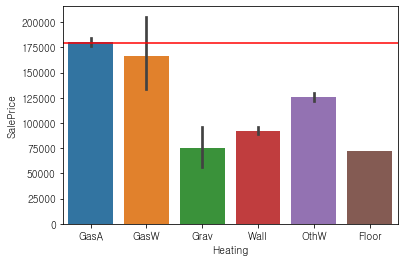

In [152]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [153]:
data[feature].isna().sum()

0

In [154]:
data[feature].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [155]:
GasA = data.loc[data.Heating == 'GasA', target]
GasW = data.loc[data.Heating == 'GasW', target]
Grav = data.loc[data.Heating == 'Grav', target]
Wall = data.loc[data.Heating == 'Wall', target]
OthW = data.loc[data.Heating == 'OthW', target]
Floor = data.loc[data.Heating == 'Floor', target]

In [156]:
spst.f_oneway(GasA, GasW, Grav, Wall, OthW, Floor)

F_onewayResult(statistic=4.536324620820041, pvalue=0.0004152855774452064)

4) 관계 평가하기

> * F값이 약 4.5, p-value가 약 0인 것으로 보아, 타켓과 관계가 없진 않지만 거의 없는(약한) 관계로 볼 수 있다.

5) 추가 분석하기

#### ④ HeatingQC --> target

In [157]:
feature = 'HeatingQC'

2) 시각화(barplot)

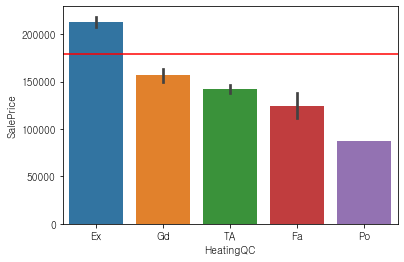

In [158]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [159]:
data[feature].isna().sum()

0

In [160]:
data[feature].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [161]:
Ex = data.loc[data.HeatingQC == 'Ex', target]
Gd = data.loc[data.HeatingQC == 'Gd', target]
TA = data.loc[data.HeatingQC == 'TA', target]
Fa = data.loc[data.HeatingQC == 'Fa', target]
Po = data.loc[data.HeatingQC == 'Po', target]

In [162]:
spst.f_oneway(Ex, Gd, TA, Fa, Po)

F_onewayResult(statistic=91.5842207923067, pvalue=1.8524937490018277e-69)

4) 관계 평가하기

> * F값이 약 91.6, p-value가 0으로 수렴하는 것으로 보아, 타켓과 강한관계로 볼 수 있다.

#### ⑤ CentralAir --> target

In [163]:
feature = 'CentralAir'

2) 시각화(barplot)

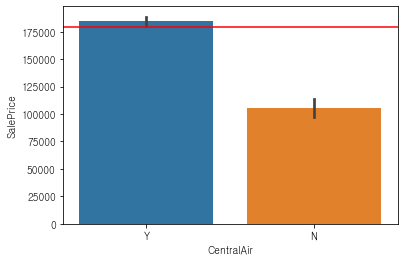

In [164]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [165]:
data[feature].isna().sum()

0

In [166]:
data[feature].unique()

array(['Y', 'N'], dtype=object)

In [167]:
Y = data.loc[data.CentralAir == 'Y', target]
N = data.loc[data.CentralAir == 'N', target]

In [168]:
spst.ttest_ind(Y, N)

Ttest_indResult(statistic=10.231742130799253, pvalue=9.003153614522727e-24)

4) 관계 평가하기

> * F값이 약 10.2, p-value가 0으로 수렴하는 것으로 보아, 타켓과 중간관계로 볼 수 있다.

5) 추가 분석하기

#### ⑥ Electrical --> target

In [169]:
feature = 'Electrical'

2) 시각화(barplot)

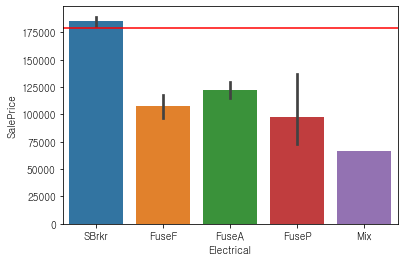

In [170]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [171]:
data[feature].isna().sum()

0

In [172]:
data[feature].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [173]:
SBrkr = data.loc[data.Electrical == 'SBrkr', target]
FuseF = data.loc[data.Electrical == 'FuseF', target]
FuseA = data.loc[data.Electrical == 'FuseA', target]
FuseP = data.loc[data.Electrical == 'FuseP', target]
Mix = data.loc[data.Electrical == 'Mix', target]

In [174]:
spst.f_oneway(SBrkr, FuseF, FuseA, FuseP, Mix)

F_onewayResult(statistic=24.365284428599715, pvalue=1.5438440492094322e-19)

4) 관계 평가하기

> * F값이 약 24.4, p-value가 0으로 수렴하는 것으로 보아, 타켓과 중간관계로 볼 수 있다.

5) 추가 분석하기

#### ⑦ BsmtFullBath --> target

In [175]:
feature = 'BsmtFullBath'

2) 시각화(barplot)

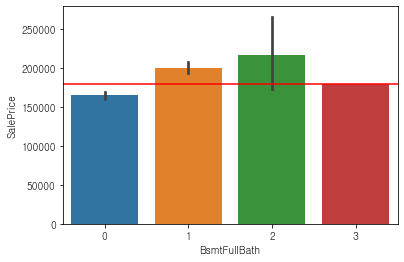

In [176]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [177]:
data[feature].isna().sum()

0

In [178]:
data[feature].unique()

array([1, 0, 2, 3], dtype=int64)

In [179]:
a = data.loc[data.BsmtFullBath == 0, target]
b = data.loc[data.BsmtFullBath == 1, target]
c = data.loc[data.BsmtFullBath == 2, target]
d = data.loc[data.BsmtFullBath == 3, target]

In [180]:
spst.f_oneway(a, b, c, d)

F_onewayResult(statistic=28.23372815136168, pvalue=9.653505445671254e-18)

4) 관계 평가하기

> * F값이 약 28.2, p-value가 0으로 수렴하는 것으로 보아, 타켓과 중간관계로 볼 수 있다.

5) 추가 분석하기

#### ⑧ BsmtHalfBath --> target

In [181]:
feature = 'BsmtHalfBath'

2) 시각화(barplot)

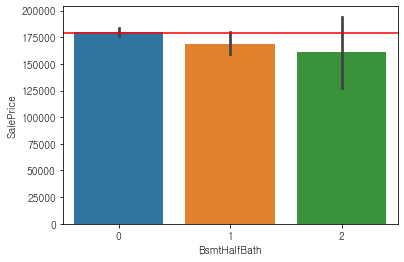

In [182]:
sns.barplot(x=feature, y=target, data=data)
plt.axhline(data[target].mean(), color='r')  # 전체 평균
plt.show()

2) 수치화(t-test / anova)

In [183]:
data[feature].isna().sum()

0

In [184]:
data[feature].unique()

array([0, 1, 2], dtype=int64)

In [185]:
a = data.loc[data.BsmtFullBath == 0, target]
b = data.loc[data.BsmtFullBath == 1, target]
c = data.loc[data.BsmtFullBath == 2, target]

In [186]:
spst.f_oneway(a, b, c)

F_onewayResult(statistic=42.3505809149488, pvalue=1.3363125610203932e-18)

4) 관계 평가하기

> * F값이 약 42.4, p-value가 0으로 수렴하는 것으로 보아, 타켓과 중간관계로 볼 수 있다.

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음